# Homework 3 - Unsupervised learning 

## *Jingheng Huan*
Netid: jh730

# 1) Cluster some data of your choice
### (6 points total)


**(a)** Go to https://github.com/public-apis/public-apis and pick a data soure of your liking. Download a dataset with at least 8 features and at least 1000 datapoints. This is unsupervised learning, if you have a target variable, you should either treat it as an additional feature, or ignore it until you get to your analysis.
(1 point).  

If you use a data sourse which requires an api key, you obtain one extra credit. You have to describe reproducibly how you got the data (including your own api-key). Also you have to *first* sent me an email with the URL of the data source you want to use: each source can only be used once, this is done one a first come, first served basis.

**(b)** Cluster the data either with k-means or GMM. Try to find the optimal k with the measures discussed in class. Discuss the result, where possible including domain knowledge. (2 points)

**(c)** Cluster the data either with DBSCAN or agglomerative clustering. Try to find the optimal parameter(s) for the chosen method. Discuss the result, where possible including domain knowledge. (2 points)

**(d)** Write a one paragraph summary what you have learned from the analysis. (1 point)

**ANSWER**

In [53]:
#(a)
import csv
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"
querystring = {"function":"TIME_SERIES_DAILY_ADJUSTED","symbol":"MSFT","outputsize":"full","datatype":"csv"}
headers = {
    "X-RapidAPI-Key": "529ae64448msh7472374aa8b3a95p1334a2jsn0433bbe60e41",
    "X-RapidAPI-Host": "alpha-vantage.p.rapidapi.com"
}
response = requests.request("GET", url, headers=headers, params=querystring)

reader = csv.reader(response.text.strip().split('\n'))


with open('output.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for row in reader:
        writer.writerow(row)

print('Done')


Done


In [54]:
#(a)
import pandas as pd

df = pd.read_csv('output.csv')
df.drop('timestamp', axis=1, inplace=True)
print(df)


        open    high     low   close  adjusted_close    volume  \
0     259.39  260.09  256.00  258.06      258.060000  30000055   
1     264.02  266.74  261.90  262.15      262.150000  29603616   
2     268.32  270.73  266.18  269.32      269.320000  28962163   
3     272.67  274.97  269.28  272.17      271.484535  37047924   
4     267.64  274.60  267.15  271.32      270.636676  44630921   
...      ...     ...     ...     ...             ...       ...   
5858   91.81   92.87   90.50   91.56       28.620414  35083700   
5859   92.31   92.75   90.31   91.75       28.679806  27119700   
5860   92.94   93.50   91.50   92.00       28.757952  22258500   
5861   92.75   94.50   91.94   92.56       28.933001  23174500   
5862   93.25   94.19   92.12   92.37       28.873609  26630600   

      dividend_amount  split_coefficient  
0                0.00                1.0  
1                0.00                1.0  
2                0.68                1.0  
3                0.00              

My dataset is from Alpha Vantage in RAPID API. (https://alpha-vantage.p.rapidapi.com/query) I can request a csv file directly by changing the string of the datatype as "csv" since it is easier for the following analysis by pandas. This dataset contains some data like `open`, `high`, `low` ,etc of one stock from period of 1999 to 2023.

In [55]:
#(b)
# we compute both the squared distances and the silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_avg = []
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    if k>1:
        silhouette_avg.append(silhouette_score(df, km.labels_))

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

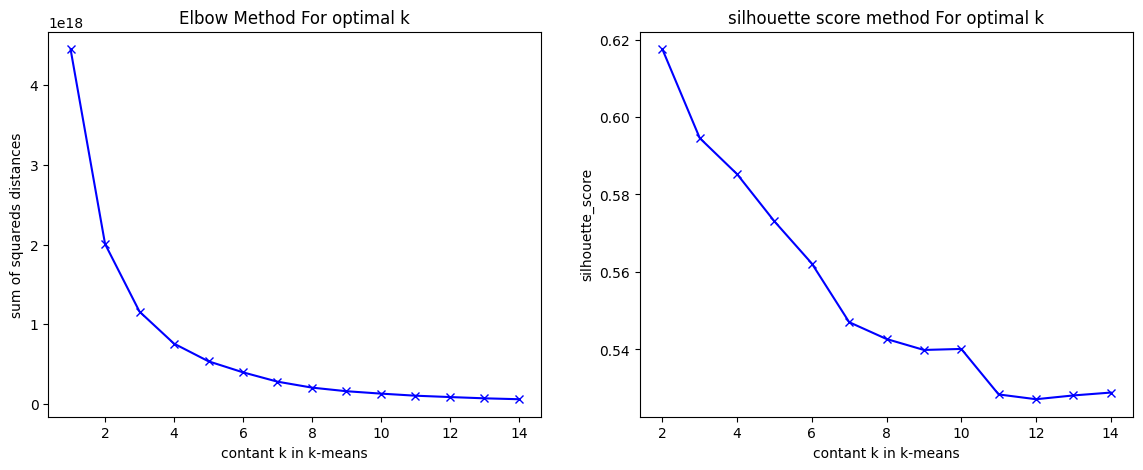

In [56]:
#(b)
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('contant k in k-means')
plt.ylabel('sum of squareds distances')
plt.title('Elbow Method For optimal k')

plt.subplot(122)
plt.plot(range(2,15), silhouette_avg, 'bx-')
plt.xlabel('contant k in k-means')
plt.ylabel('silhouette_score')
plt.title('silhouette score method For optimal k')

plt.show()

(b) According to plot of Elbow Method for optimal k, we can see that the elbow point is at k=3 since the slope change suddenly at 3. So I choose k=3 for k-means clustering from elbow method.

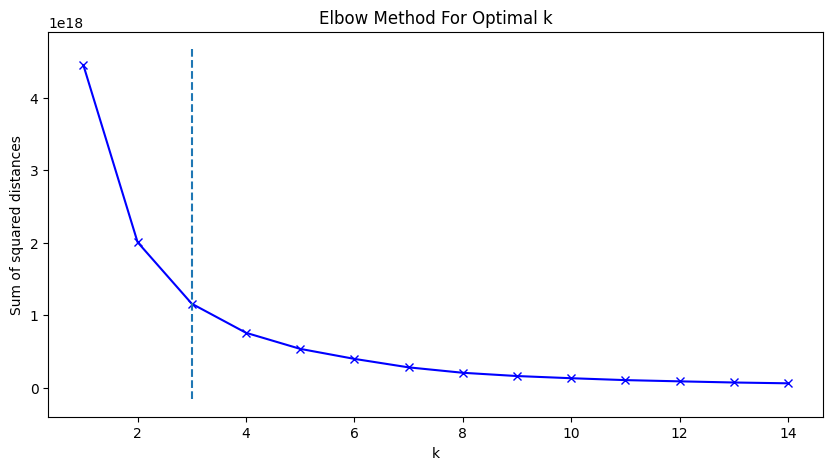

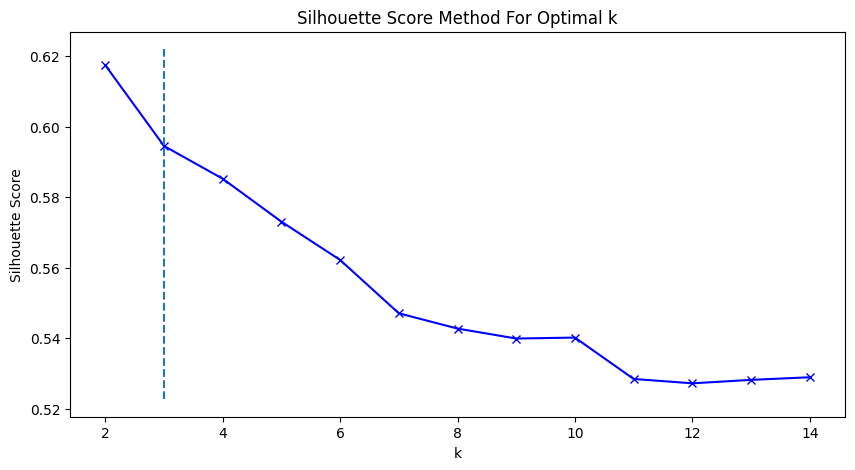

1    3448
2    2148
0     267
Name: cluster, dtype: int64


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
#(b)
# find the optimal k using elbow method and silhouette score method
optimal_k_elbow = 3
optimal_k_silhouette = 3

# visualize the elbow method
plt.figure(figsize=(10,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.vlines(optimal_k_elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

# visualize the silhouette score method
plt.figure(figsize=(10,5))
plt.plot(range(2,15), silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method For Optimal k')
plt.vlines(optimal_k_silhouette, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

# perform K-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k_elbow, random_state=0)
clusters = kmeans.fit_predict(df)
df['cluster'] = clusters

# print the number of data points in each cluster
print(df['cluster'].value_counts())


**(b)**
Based on the data we obtained, we can further analyze the clusters to gain some insights about the stock performance and the stock market trends over the period from 1999 to 2023. Based on the number of data points in each cluster, we can see that the clustering resulted in an imbalanced distribution, with cluster 1 having the most data points (3448), followed by cluster 2 (2148), and cluster 0 (267). For the domain knowledge to analyze the result, we could look at the values of the `open`, `high`, `low`, `close`, and `volume` columns for each cluster to see if there are any patterns or trends that can be observed. We could compare the clusters to any known categories or classifications, such as market sectors, industry groups, or company sizes, and see if the clusters correspond to any of these categories.

In [58]:
#(c)
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data before clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Define the range of values for epsilon and min_samples
epsilon_range = [0.1, 0.5, 1, 1.5]
min_samples_range = [2, 3, 5, 7, 10, 12]

# Loop through all possible combinations of epsilon and min_samples
for epsilon in epsilon_range:
    for min_samples in min_samples_range:
        # Apply DBSCAN clustering
        db = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = db.fit_predict(df_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        # Print the results
        print(f"epsilon: {epsilon:.2f}, min_samples: {min_samples}, n_clusters: {n_clusters}, n_noise: {n_noise}")


epsilon: 0.10, min_samples: 2, n_clusters: 123, n_noise: 363
epsilon: 0.10, min_samples: 3, n_clusters: 67, n_noise: 475
epsilon: 0.10, min_samples: 5, n_clusters: 40, n_noise: 673
epsilon: 0.10, min_samples: 7, n_clusters: 32, n_noise: 937
epsilon: 0.10, min_samples: 10, n_clusters: 19, n_noise: 1260
epsilon: 0.10, min_samples: 12, n_clusters: 16, n_noise: 1388
epsilon: 0.50, min_samples: 2, n_clusters: 26, n_noise: 26
epsilon: 0.50, min_samples: 3, n_clusters: 14, n_noise: 50
epsilon: 0.50, min_samples: 5, n_clusters: 5, n_noise: 92
epsilon: 0.50, min_samples: 7, n_clusters: 6, n_noise: 103
epsilon: 0.50, min_samples: 10, n_clusters: 4, n_noise: 135
epsilon: 0.50, min_samples: 12, n_clusters: 4, n_noise: 142
epsilon: 1.00, min_samples: 2, n_clusters: 9, n_noise: 10
epsilon: 1.00, min_samples: 3, n_clusters: 6, n_noise: 16
epsilon: 1.00, min_samples: 5, n_clusters: 5, n_noise: 26
epsilon: 1.00, min_samples: 7, n_clusters: 5, n_noise: 36
epsilon: 1.00, min_samples: 10, n_clusters: 5, n

(c)
By applying DBSCAN, I choose `epsilon_range` = [0.1, 0.5, 1, 1.5], `min_samples_range` = [2, 3, 5, 7, 10, 12] as optimal parameters because we can get a low number of noise points while producing a reasonable clusters. Also when we Look at the results, we can see that as we increase the value of `epsilon`, the number of clusters decreases while the number of noise points increases. This is because a larger value of `epsilon` means that more data points are included in each cluster, and so fewer clusters are needed to represent the data. On the other hand, as we increase the value of `min_samples`, the number of clusters decreases and the number of noise points increases. This is because a larger value of `min_samples` means that more data points are required to form a cluster, so fewer clusters are formed overall.

In terms of domain knowledge, if a large number of data points belong to a particular cluster, we could look at the characteristics of those data points to see if there are any interesting patterns or trends that can be observed. We could also use this information to adjust our investment strategy based on the cluster that the stock belongs to.

(d) Summary:
In this analysis, I used both `K-Means` and `DBSCAN` clustering two algorithms to cluster the stock data of a single stock from 1999 to 2023. By finding the optimal number of clusters and parameters for each algorithm, I gained insights into the performance of the stock and the stock market trends over this period of 1999-2023. I learned that both algorithms can be useful in analyzing large datasets and identifying patterns and trends in the dataset. By applying domain knowledge and analyzing the characteristics of the data points in each cluster, we can gain deeper insights and make more informed decisions based on the data. In a nutshell, clustering can provide useful insights into the stock market and inform investment strategies for both individuals and companies.